In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cleaning Numerical Data

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()
customer_df.shape



(9134, 24)

In [3]:
cols=[]
for i in customer_df.columns:
    cols.append(i.lower())
customer_df.columns = cols
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [4]:


customer_df = customer_df.rename(columns = {"employmentstatus":"employment_status"})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)



In [6]:
customer_df["effective_to_date"] = customer_df["effective_to_date"].astype("datetime64[ns]")
customer_df["effective_to_date"].info

<bound method Series.info of 0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]>

In [7]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
def getint(df):
    df_int = df.select_dtypes('int64')
    return df_int
def getfloat(df):
    df_float = df.select_dtypes('float64')
    return df_float

discrete_df = getint(customer_df)
continuous_df = getfloat(customer_df)
display(discrete_df.dtypes)
display(continuous_df.dtypes)
display(discrete_df.head(1))
display(continuous_df.head(1))

income                           int64
monthly_premium_auto             int64
months_since_last_claim          int64
months_since_policy_inception    int64
number_of_open_complaints        int64
number_of_policies               int64
dtype: object

customer_lifetime_value    float64
total_claim_amount         float64
dtype: object

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1


,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147


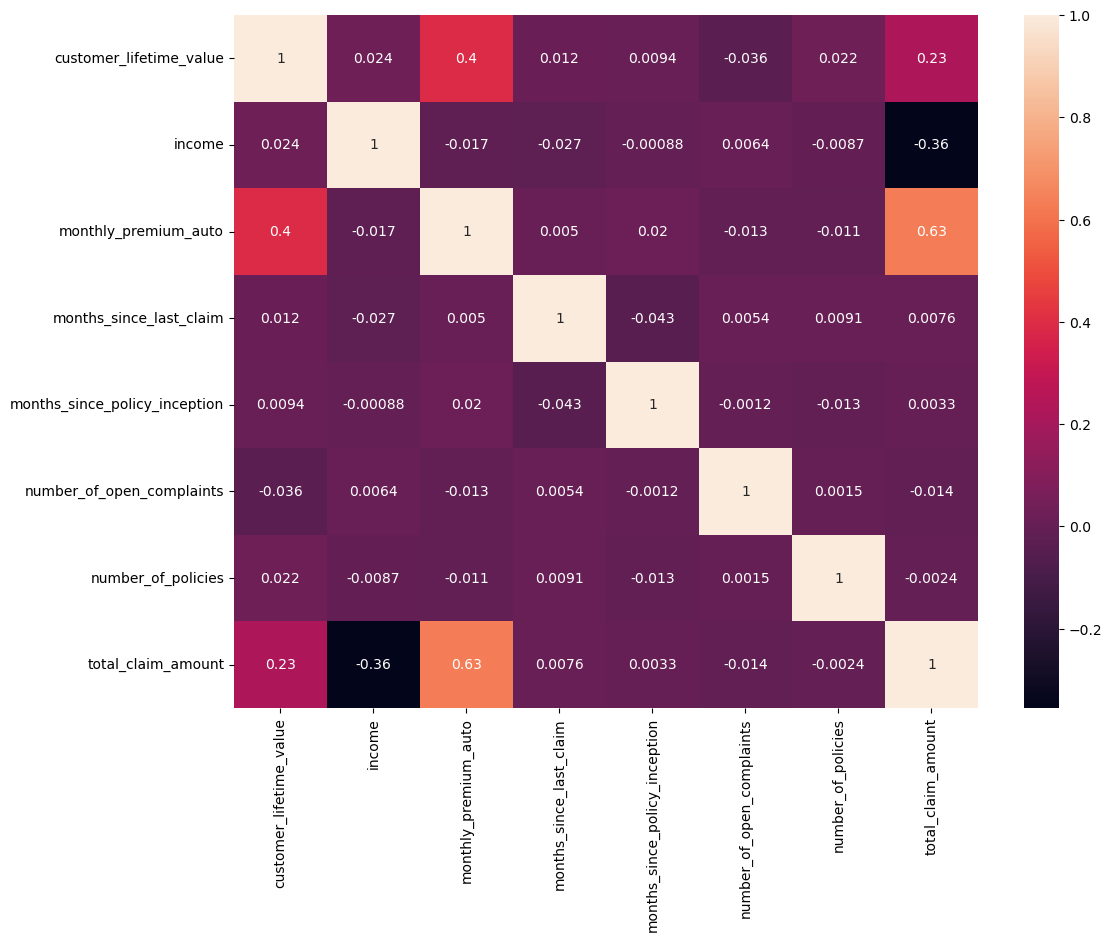

In [9]:
plt.figure(figsize=(12, 9))
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [10]:
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [11]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

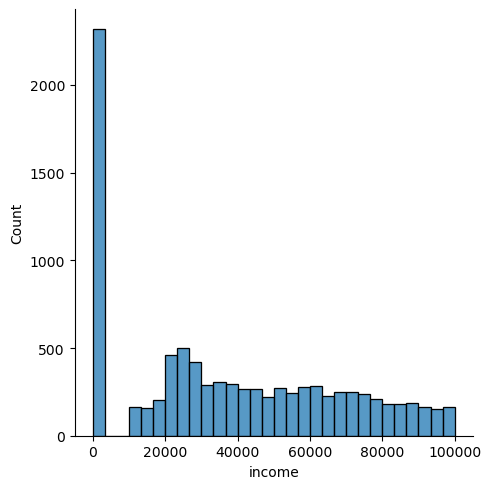

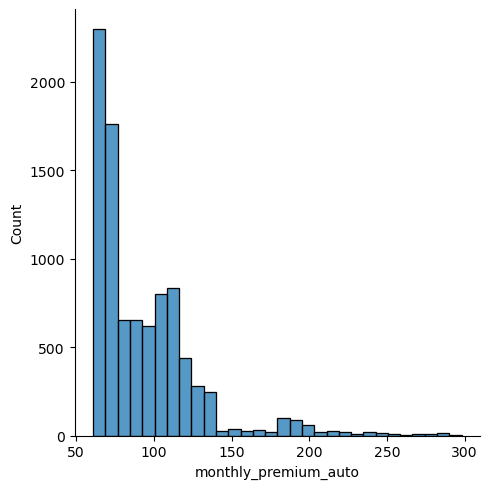

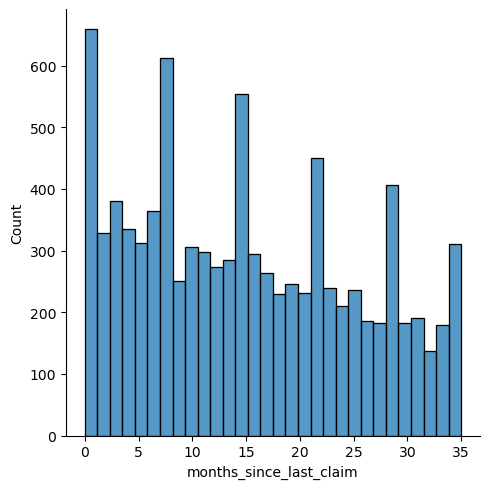

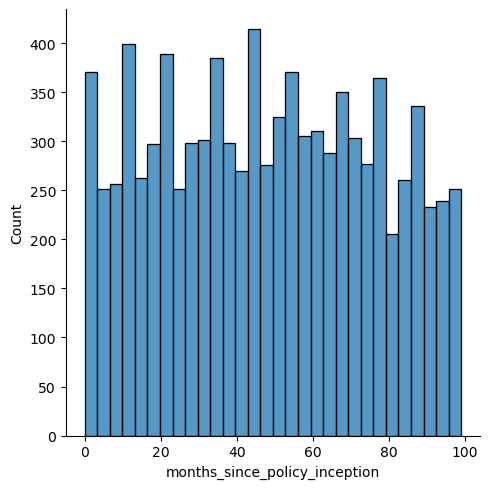

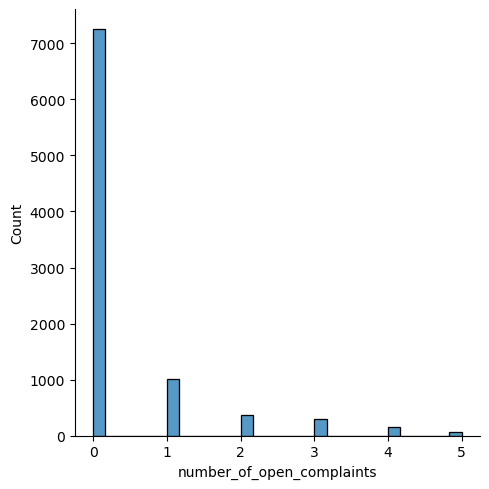

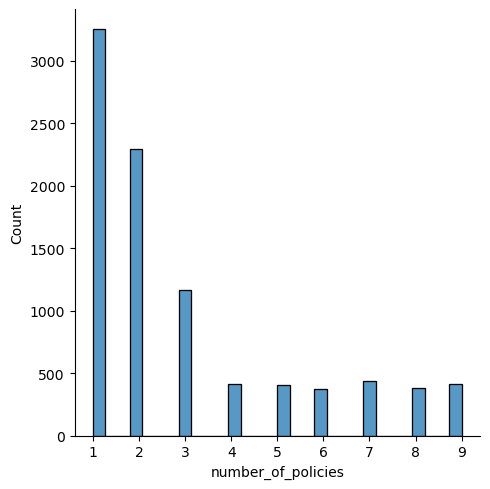

In [12]:
for i in discrete_df.columns:
    sns.displot(x = i, data = discrete_df, bins=30)
    plt.show()

In [13]:
discrete_df["income"].value_counts()

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

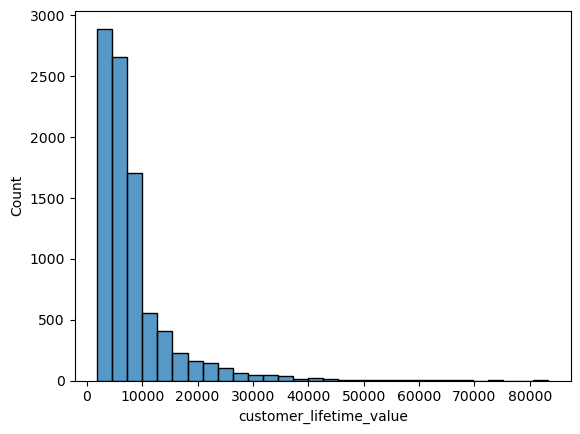

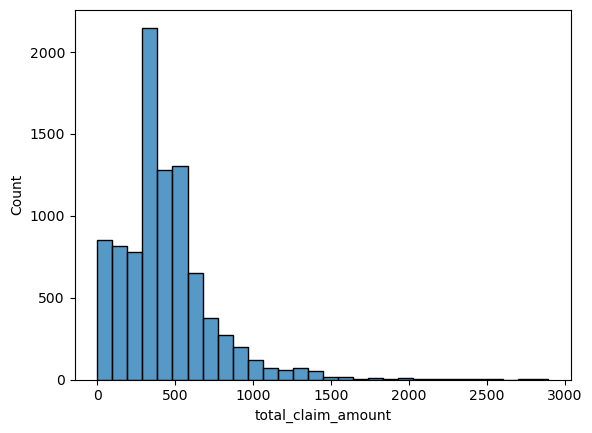

In [14]:
for i in continuous_df.columns:
    sns.histplot(x = i, data = continuous_df, bins=30)
    plt.show()

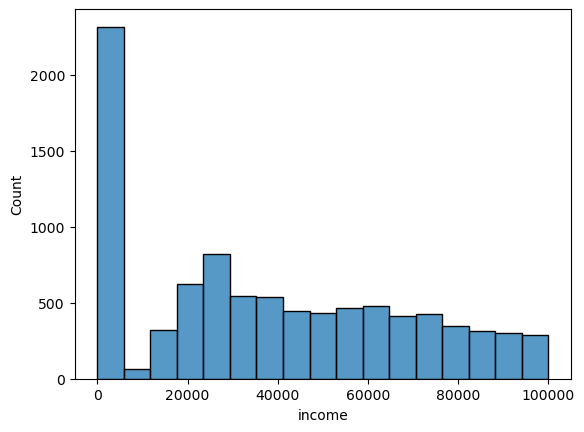

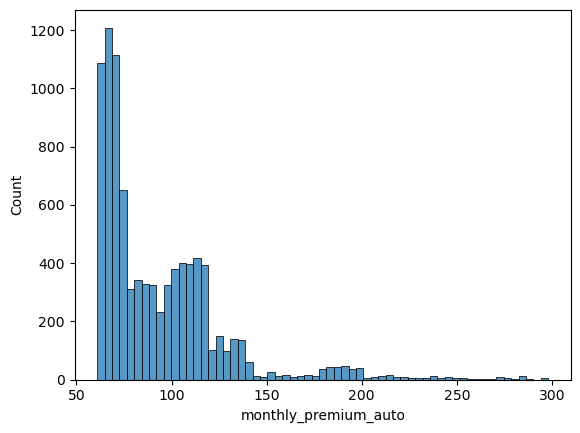

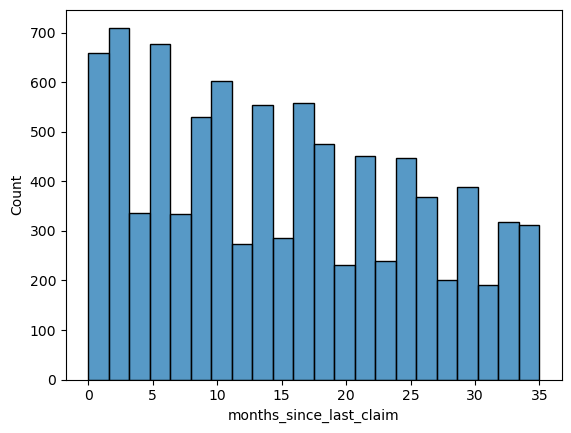

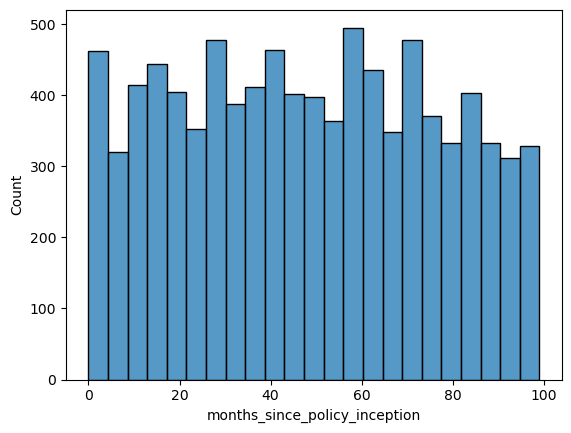

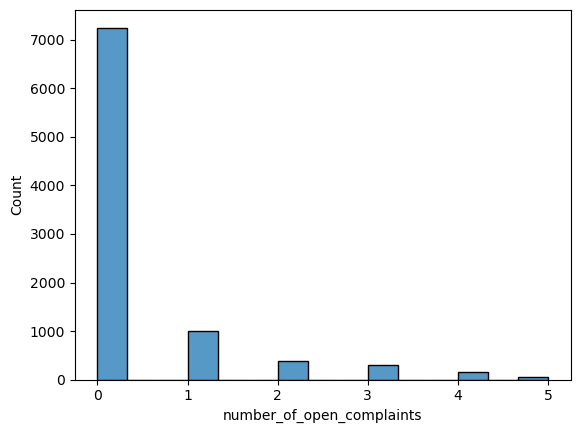

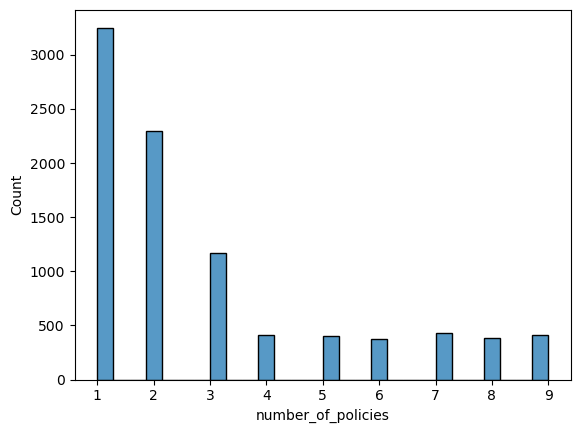

In [15]:
for i in discrete_df.columns:
    sns.histplot(x = i, data = discrete_df)
    plt.show()

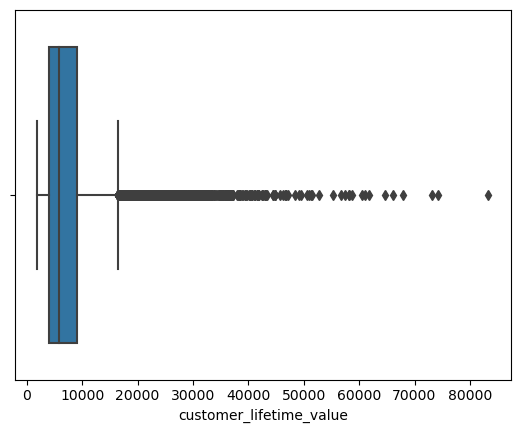

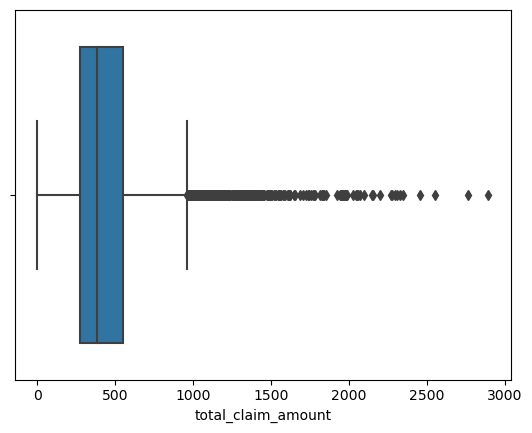

In [16]:
for i in continuous_df.columns:
    sns.boxplot(x = i, data = continuous_df)
    plt.show()

In [17]:
continuous_df["total_claim_amount"].value_counts()

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
377.442796      1
20.985105       1
280.897050      1
268.130863      1
790.784983      1
Name: total_claim_amount, Length: 5106, dtype: int64

In [18]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Cleaning Categotical Data

In [19]:
categorical_df = customer_df.select_dtypes(include=[np.object])
categorical_df

/var/folders/q5/ywjsx89514x2b_9dvdlcfngw0000gn/T/ipykernel_5031/1025927049.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(include=[np.object])


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [20]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [21]:
for i in categorical_df.columns:
    print("column", i+":")
    display(categorical_df[i].value_counts(dropna = False))

column customer:


BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

column state:


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

column response:


No     7826
Yes    1308
Name: response, dtype: int64

column coverage:


Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

column education:


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

column employment_status:


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

column gender:


F    4658
M    4476
Name: gender, dtype: int64

column location_code:


Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

column marital_status:


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

column policy_type:


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

column policy:


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

column renew_offer_type:


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

column sales_channel:


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

column vehicle_class:


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

column vehicle_size:


Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [22]:
# the value master and doctor we can combine as a "higher educational degree"
# college combine with bachelor "college"

In [23]:
# make 1 bigger category consists of luxury cars, luxury suv, and sport cars

In [24]:
# combine medical leave with employed. or search the definition further
# might combine medical_leave and disabled into 1 new category
# might combine retired with unemployed

In [25]:
categorical_df = categorical_df.drop(["customer"], axis = 1)
categorical_df.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [26]:
categorical_df = categorical_df.drop(["policy"], axis = 1)
categorical_df.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [27]:
categorical_df['vehicle_class'] = np.where(categorical_df.vehicle_class.isin(["Sports Car","Luxury SUV","Luxury Car"]),'Luxury Cars', categorical_df.vehicle_class)
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury Cars       831
Name: vehicle_class, dtype: int64

In [28]:
def clean_education(x):
    if x in ["Master", "Doctor"]:
        return 'higher educational degree'
    elif x in ["Bachelor", "College"]:
        return "baccalaureate degree"
    else:
        return x

categorical_df['education'] = categorical_df['education'].apply(clean_education)
categorical_df['education'].value_counts()

baccalaureate degree         5429
High School or Below         2622
higher educational degree    1083
Name: education, dtype: int64

In [29]:
categorical_df['employment_status'] = np.where(categorical_df.employment_status.isin(["Medical Leave","Disabled"]),'M-D_related_leave', categorical_df.employment_status)
categorical_df['employment_status'] = np.where(categorical_df.employment_status.isin(["Retired"]),'Unemployed', categorical_df.employment_status)
categorical_df['employment_status'].value_counts()


Employed             5698
Unemployed           2599
M-D_related_leave     837
Name: employment_status, dtype: int64

In [30]:
categorical_df

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,baccalaureate degree,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,baccalaureate degree,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,baccalaureate degree,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,baccalaureate degree,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,baccalaureate degree,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,baccalaureate degree,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,baccalaureate degree,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,baccalaureate degree,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,baccalaureate degree,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large
